## Load functions

In [23]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from kmeans import vis_tsne
from scipy.cluster.hierarchy import fcluster
# test data
from sklearn.datasets import load_iris

In [24]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

def plot_dendro(X, link_method, annotate_threshold, hline):
    """
    link_method: single or ward
    """
    labelList = range(np.shape(X)[0])
    linked = linkage(X, link_method)
    fancy_dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            max_d = hline,
            annotate_above=annotate_threshold)
    plt.show()

def dendro_cluster(X, threshold, link_method):
    f_cut = fcluster(linkage(X, method=link_method), threshold,criterion='distance')
    vis_tsne(X,f_cut)
    return f_cut

## plot dendrogram

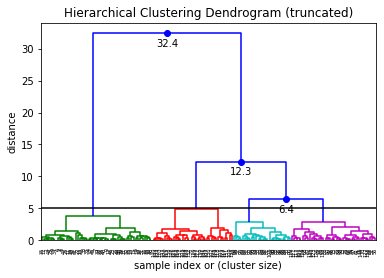

In [25]:
X = load_iris().data
link_method = 'ward'
annotate_threshold = 5
hline = 5
plot_dendro(X, link_method, annotate_threshold, hline)

## select cutoff and visualize clusters

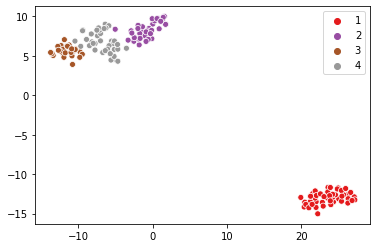

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 3 4 3 4 3 4 3 3 4 3 4 3 4 3 3 4 3 4 4 4 4
 4 4 4 2 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 2 4 2 2 2 2 3 2 2 2 2
 2 2 4 4 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 4 2 2 2 4 2 2 2 4 2 2 2 4 2
 2 4]


In [27]:
cut_off = 5
membership = dendro_cluster(X, cut_off, link_method)
print(membership)

## save cluster memberships

In [22]:
np.save("hierarchical_membership.npy",membership)